In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold , cross_val_score

# company data and zoo data both are in this file only 

# zoo data

In [56]:
zoo = pd.read_csv("Zoo (1).csv")

In [57]:
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [58]:
zoo.drop(['animal_name'],axis = 1,inplace=True)

In [59]:
array = zoo.values

In [60]:
array

array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 4],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 7],
       [0, 1, 1, ..., 0, 0, 2]], dtype=int64)

In [61]:
x=array[:,0:8]
y=array[:,8]

In [62]:
x

array([[1, 0, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 1],
       [1, 0, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1],
       [0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 1, 1, 1],
       [0, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0, 1, 1, 1],
       [1, 0, 0, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1],
       [0,

In [63]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [64]:
num_folds=10

In [65]:
#Grid search for Algorithm tunning 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [66]:
kfold= KFold(n_splits=10)

In [67]:
model1 = KNeighborsClassifier(n_neighbors = 19)

In [68]:
results = cross_val_score(model1, x, y , cv = kfold)
print(results.mean())

0.86


<Axes: ylabel='Frequency'>

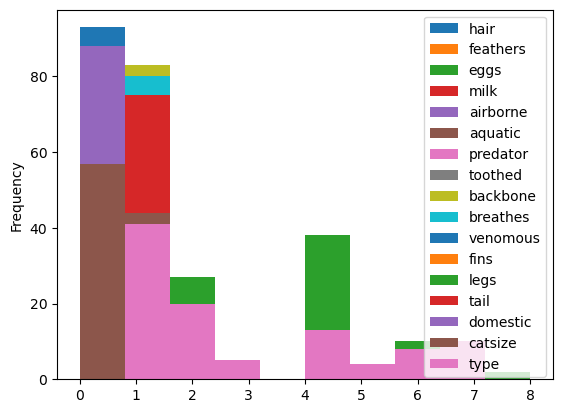

In [69]:
zoo.plot.hist(bins=10)

the frequency is not proper.

<Axes: ylabel='Density'>

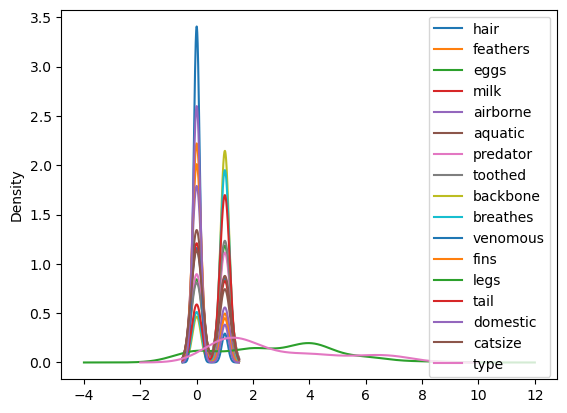

In [70]:
zoo.plot.density()

<Axes: xlabel='feathers', ylabel='type'>

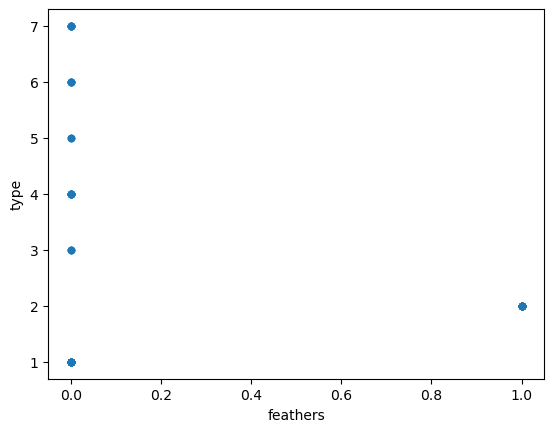

In [71]:
zoo.plot.scatter('feathers','type')

  it has lot of outliers..

C:\Users\anura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


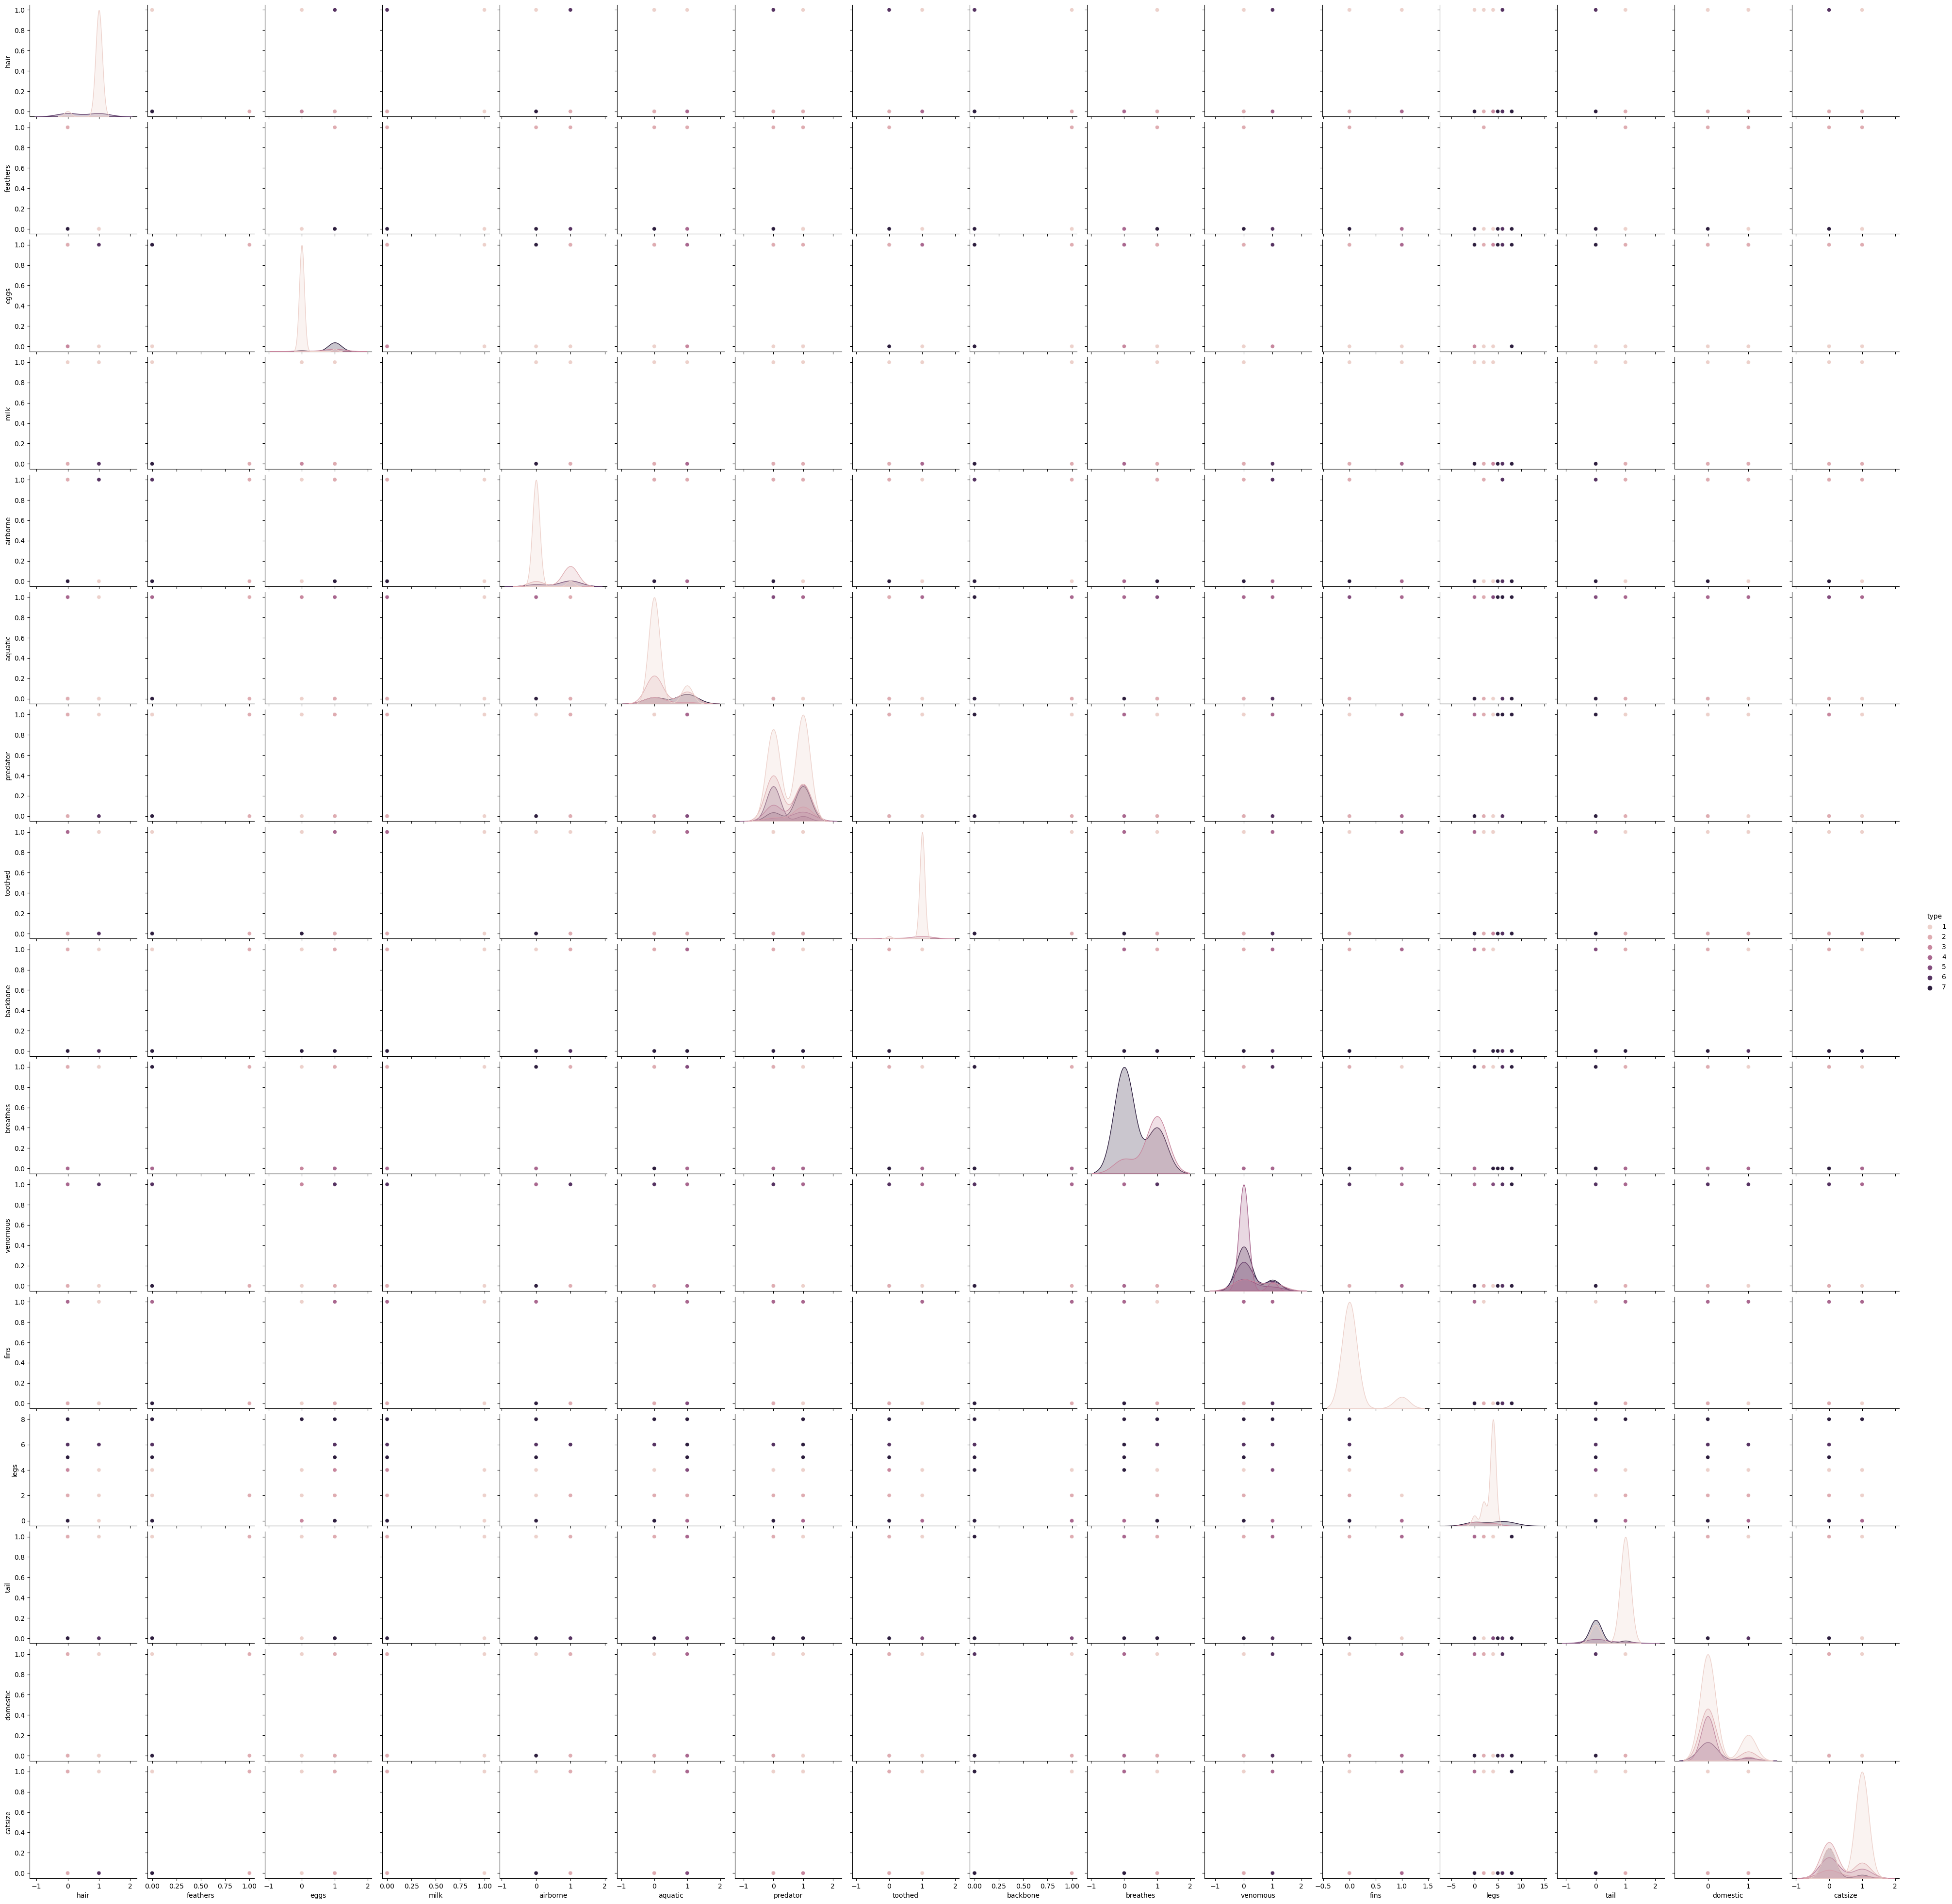

In [72]:
sns.pairplot(zoo, hue="type")

In [75]:
#grid search for algorithm tunning
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [74]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [77]:
print(grid.best_score_)
print(grid.best_params_)

0.9800000000000001
{'n_neighbors': 1}


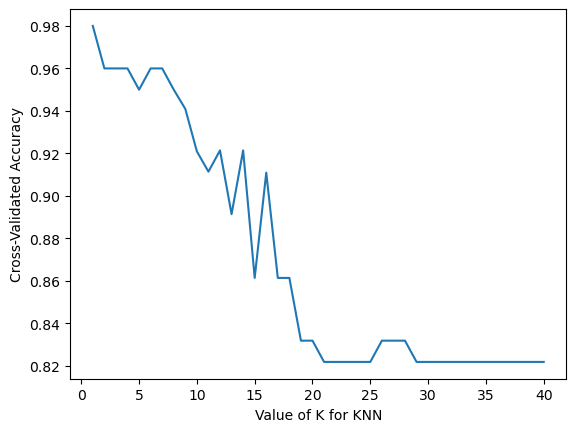

In [78]:
#visualizing the CV results
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

the zoo data has high variation for all points.

# glass data

In [3]:
glass = pd.read_csv("glass.csv")

In [6]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
import pandas as pd
glass['RI'] = glass['RI'].astype(int)
glass['Na'] = glass['Na'].astype(int)
glass['Mg'] = glass['Mg'].astype(int)
glass['Al'] = glass['Al'].astype(int)
glass['Si'] = glass['Si'].astype(int)
glass['K'] = glass['K'].astype(int)
glass['Ba'] = glass['Ba'].astype(int)
glass['Ca'] = glass['Ca'].astype(int)


In [8]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,13,4,1,71,0,8,0,0.0,1
1,1,13,3,1,72,0,7,0,0.0,1
2,1,13,3,1,72,0,7,0,0.0,1
3,1,13,3,1,72,0,8,0,0.0,1
4,1,13,3,1,73,0,8,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1,14,0,2,72,0,9,1,0.0,7
210,1,14,0,1,73,0,8,1,0.0,7
211,1,14,0,2,73,0,8,1,0.0,7
212,1,14,0,1,73,0,8,1,0.0,7


In [9]:
array1 = glass.values

In [10]:
array1

array([[ 1., 13.,  4., ...,  0.,  0.,  1.],
       [ 1., 13.,  3., ...,  0.,  0.,  1.],
       [ 1., 13.,  3., ...,  0.,  0.,  1.],
       ...,
       [ 1., 14.,  0., ...,  1.,  0.,  7.],
       [ 1., 14.,  0., ...,  1.,  0.,  7.],
       [ 1., 14.,  0., ...,  1.,  0.,  7.]])

In [30]:
x=array1[:,0:9]
y=array1[:,9]

In [31]:
x

array([[ 1., 13.,  4., ...,  8.,  0.,  0.],
       [ 1., 13.,  3., ...,  7.,  0.,  0.],
       [ 1., 13.,  3., ...,  7.,  0.,  0.],
       ...,
       [ 1., 14.,  0., ...,  8.,  1.,  0.],
       [ 1., 14.,  0., ...,  8.,  1.,  0.],
       [ 1., 14.,  0., ...,  8.,  1.,  0.]])

In [32]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [33]:
num_folds=10

In [34]:
kfold1 = KFold(n_splits=10)
kfold1

KFold(n_splits=10, random_state=None, shuffle=False)

In [35]:
model2 = KNeighborsClassifier(n_neighbors=10)
model2

KNeighborsClassifier(n_neighbors=10)

In [44]:
results=cross_val_score(model,x,y,cv=kfold1)
print(results.mean())

0.34264069264069263


<Axes: ylabel='Frequency'>

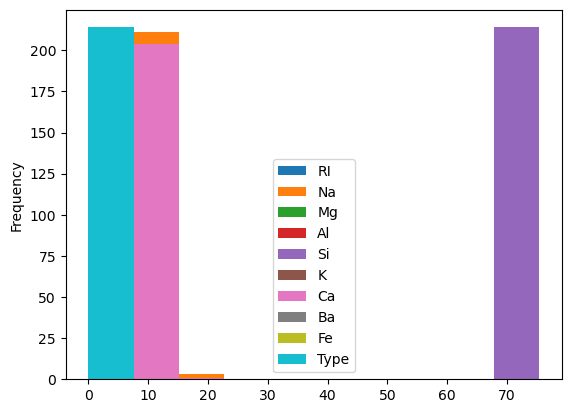

In [4]:
glass.plot.hist(bins=10)

Na as the less frequancy.

<Axes: xlabel='RI', ylabel='Ca'>

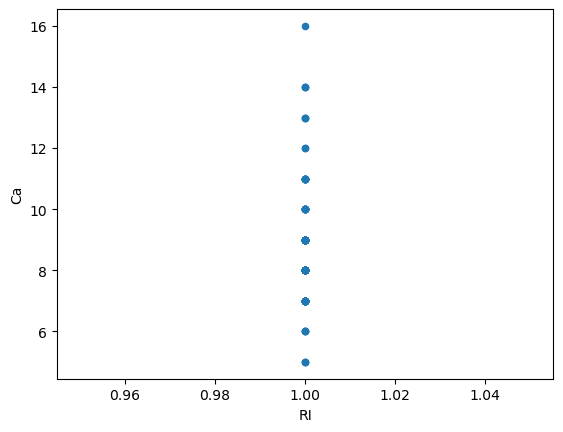

In [39]:
glass.plot.scatter('RI','Ca')

the one point is the outlier 

C:\Users\anura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


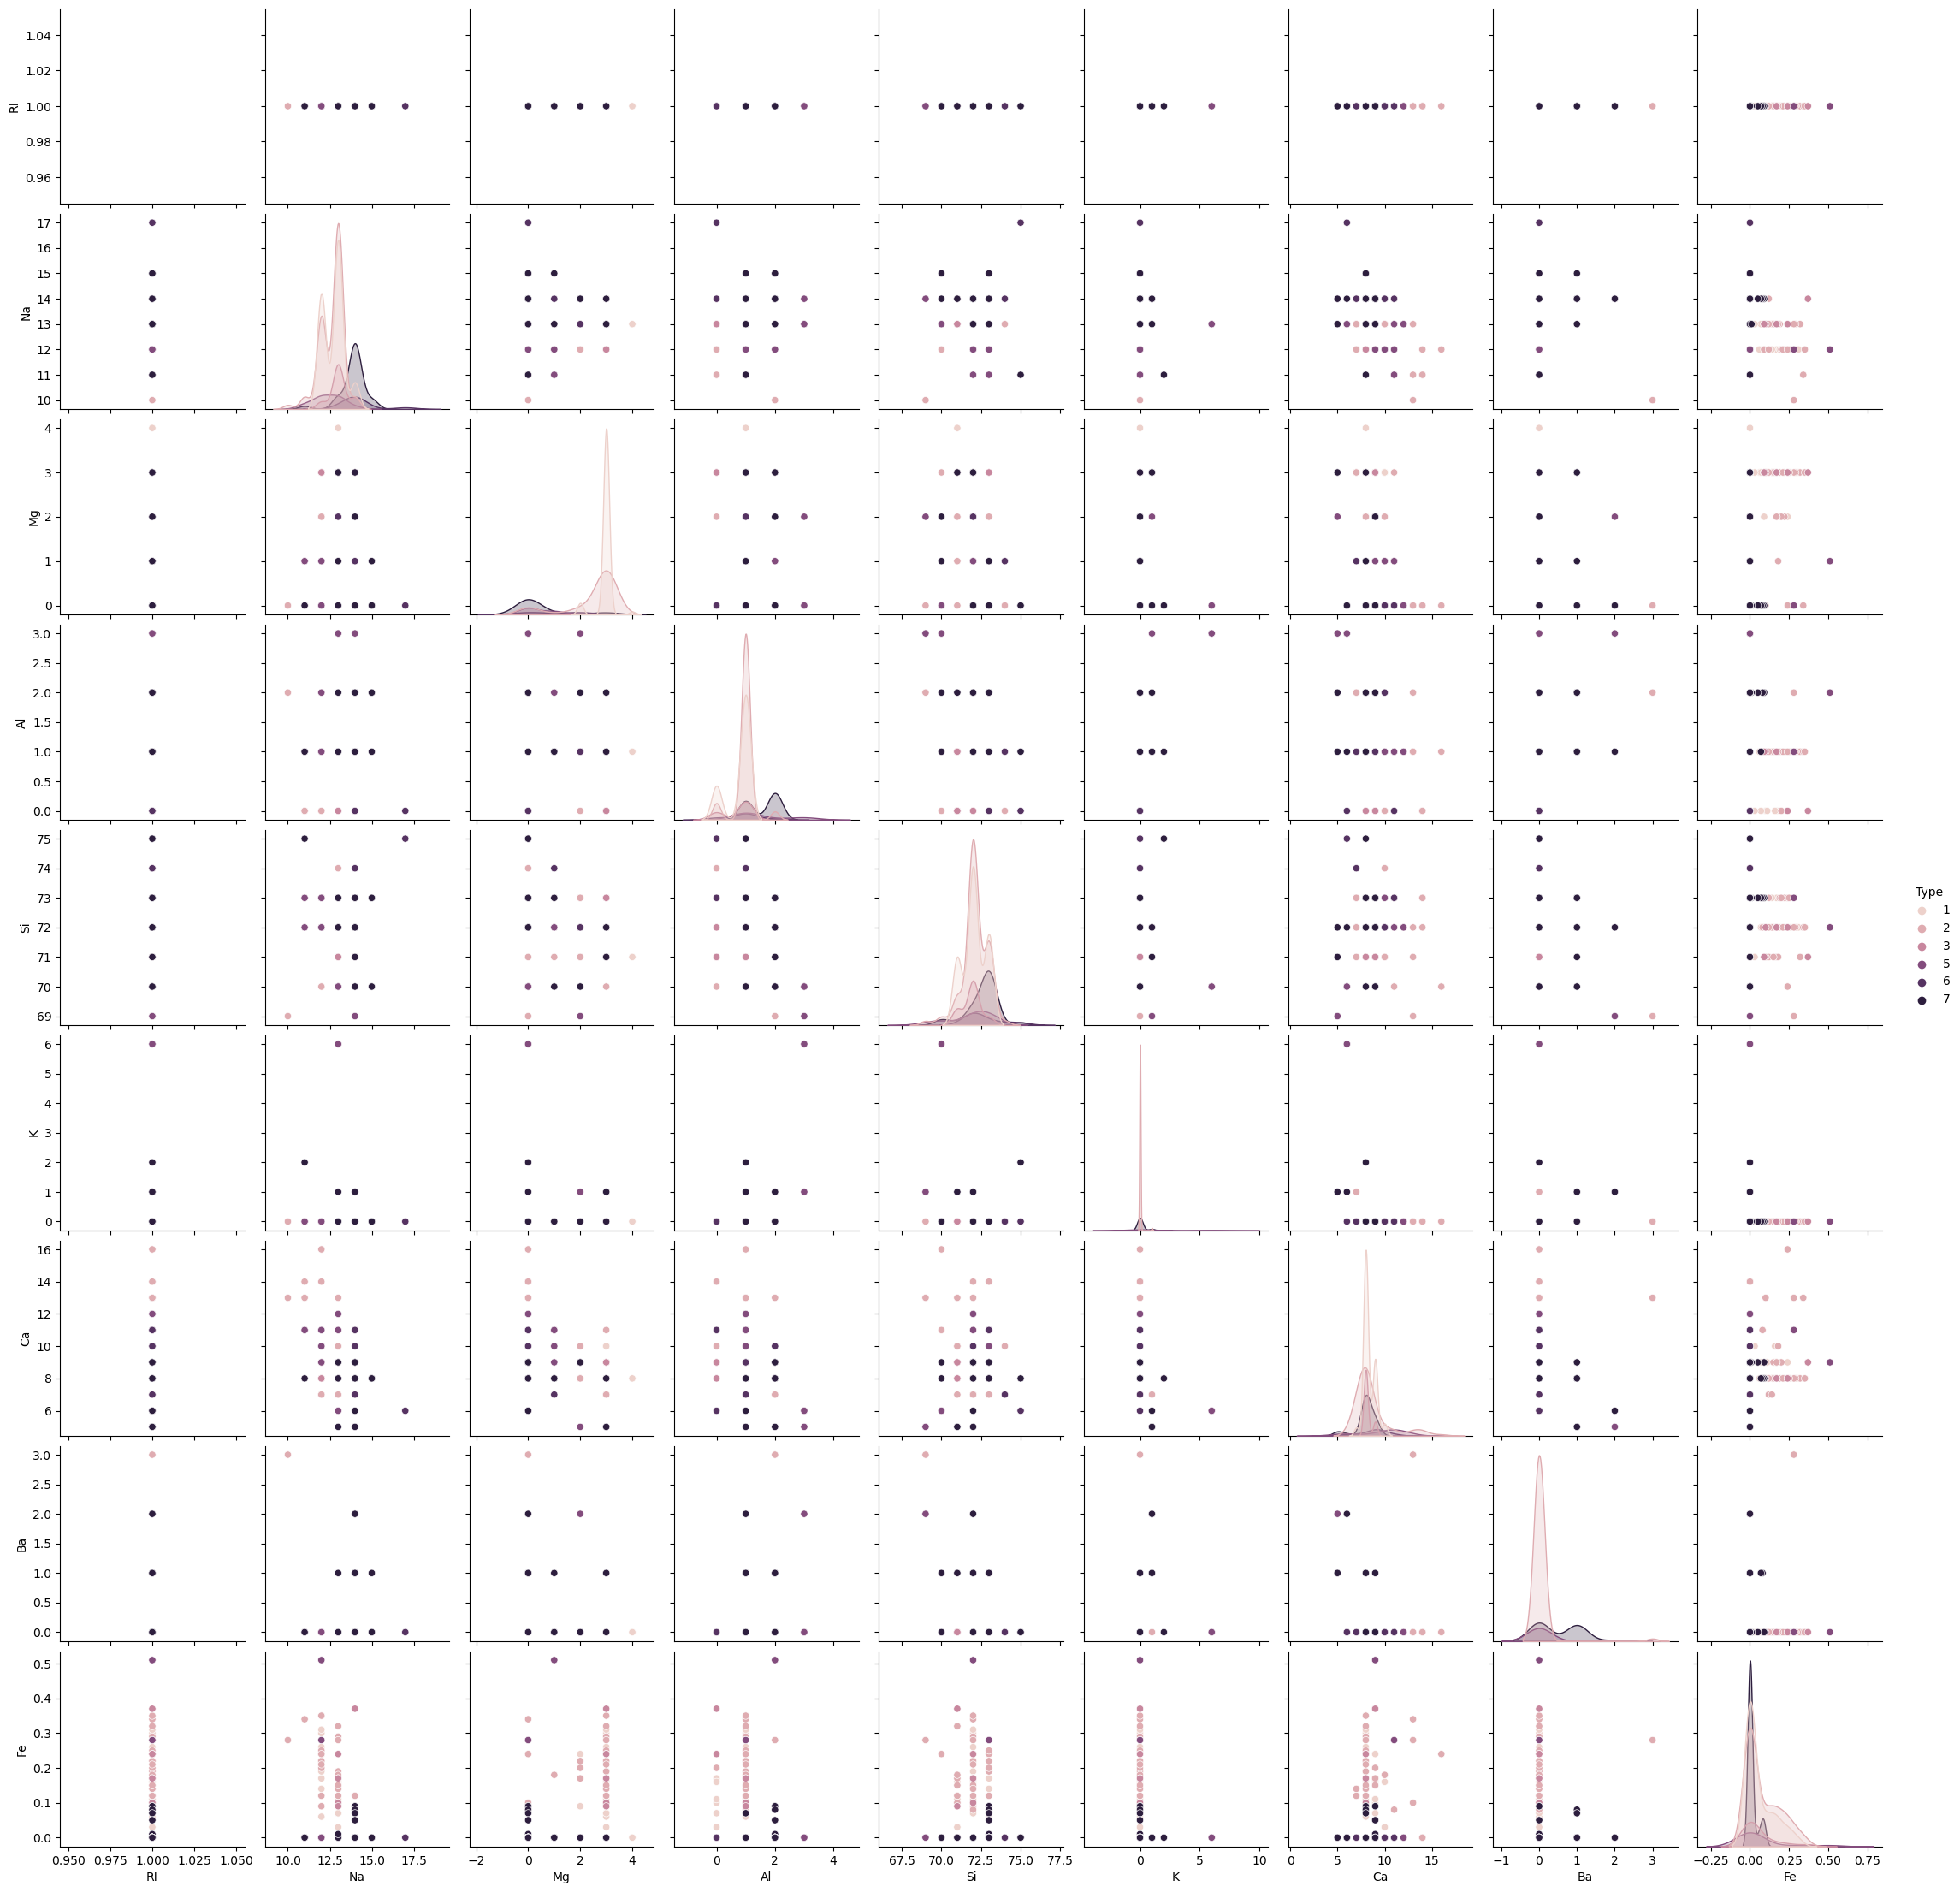

In [40]:
import seaborn as sns
sns.pairplot(glass, hue="Type")

In [76]:
#grid search for algorithm tunning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [45]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [46]:
print(grid.best_score_)
print(grid.best_params_)

0.5423034330011075
{'n_neighbors': 13}


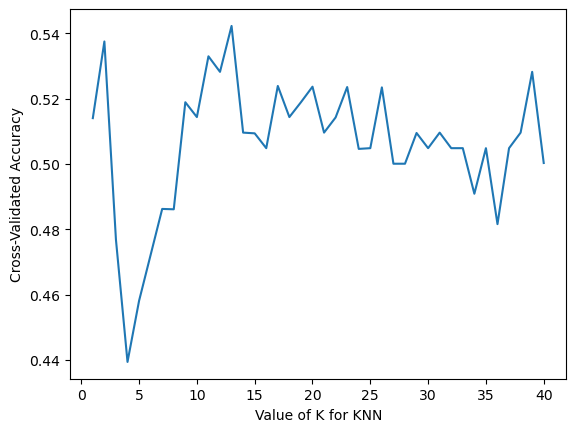

In [48]:
#visualizing the CV results
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# at first the data as high variation and then it has normal variation.